✅ Dataset loaded
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

=== Evaluation Results ===
Confusion Matrix:
 [[79 20]
 [27 28]]
Accuracy: 0.695
Error Rate: 0.305
Precision: 0.583
Recall: 0.509


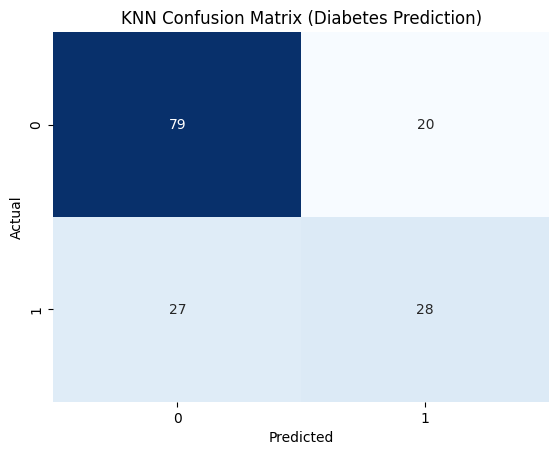

In [2]:
# ----------------------------------------
# 1. Download dataset using kagglehub
# ----------------------------------------

# %pip install -q kagglehub scikit-learn pandas numpy matplotlib seaborn


# ----------------------------------------
# 2. Load and inspect dataset
# ----------------------------------------
import pandas as pd

df = pd.read_csv("diabetes.csv")
print("✅ Dataset loaded")
print(df.head())
print("\nColumns:", df.columns.tolist())

# ----------------------------------------
# 3. Split dataset
# ----------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ----------------------------------------
# 4. Train KNN model
# ----------------------------------------
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# ----------------------------------------
# 5. Evaluate model
# ----------------------------------------
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
err_rate = 1 - acc
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print("\n=== Evaluation Results ===")
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {acc:.3f}")
print(f"Error Rate: {err_rate:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")

# ----------------------------------------
# 6. Visualize Confusion Matrix
# ----------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix (Diabetes Prediction)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
